<a href="https://colab.research.google.com/github/rohitcricket/Tensorflow2.0-SmilingFaceModel/blob/master/Bonus_4_Deploy_Smiling_Face_Model_Using_TF2_0_Serving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEP #0: PROBLEM STATEMENT

- In this project, we will build, train and test a model to classify smiling faces using TensorFlow 2.0 similar to what we have already done in the past
- What's new is that we are going to deploy the model in practice using Tensorflow Serving. 

- Note: TF serving code section is inspired by the TensorFlow 2.0 Documentation: https://www.tensorflow.org/tfx/serving/tutorials/Serving_REST_simple 

## STEP #1: IMPORT PACKAGES

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
from tensorflow import keras


In [0]:
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import os


In [0]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import h5py
import random 

# STEP #2: IMPORT DATASET

In [0]:
filename = '/content/drive/My Drive/Colab Notebooks/train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file.

list_classes
train_set_x
train_set_y


In [0]:
happy_training = h5py.File('/content/drive/My Drive/Colab Notebooks/train_happy.h5', "r")
happy_testing  = h5py.File('/content/drive/My Drive/Colab Notebooks/test_happy.h5', "r")

In [0]:
X_train = np.array(happy_training["train_set_x"][:]) 
y_train = np.array(happy_training["train_set_y"][:]) 

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:]) 


In [0]:
train_images = X_train 
train_labels = y_train
test_images = X_test 
test_labels = y_test

In [0]:
train_images.shape

(600, 64, 64, 3)

0


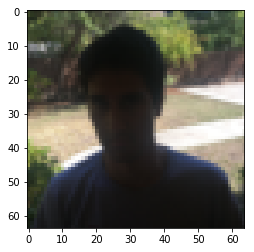

In [0]:
i = random.randint(1,600) # select any random index from 1 to 600
plt.imshow( train_images[i] )
print(train_labels[i])


In [0]:

# Normalize data
train_images = train_images / 255.0
test_images = test_images / 255.0


In [0]:
train_images.shape

(600, 64, 64, 3)

In [0]:
test_images.shape

(150, 64, 64, 3)

In [0]:

class_names = ['Sad', 'Happy']


In [0]:
train_labels

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

# STEP #3: BUILD, TRAIN AND TEST THE MODEL

In [0]:
from tensorflow.keras import datasets, layers, models

model = models.Sequential()

model.add(layers.Conv2D(64, (6,6), activation = 'relu', input_shape = (64,64,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Dropout(0.2))


model.add(layers.Conv2D(64, (5,5), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation = 'relu'))

model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

W0905 02:34:38.534584 139660135913344 deprecation.py:506] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling __init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 59, 59, 64)        6976      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [0]:
epochs = 30

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='binary_crossentropy',
              metrics=['accuracy'])


W0905 02:34:38.746592 139660135913344 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/nn_impl.py:180: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_images.shape

(600, 64, 64, 3)

In [0]:
train_labels.shape

(600,)

In [0]:
model.fit(train_images, train_labels, epochs=epochs)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('\nTest accuracy: {}'.format(test_acc))

Epoch 1/30
600/600 [==============================] - 3s 5ms/sample - loss: 0.7220 - acc: 0.4800
Epoch 2/30
600/600 [==============================] - 0s 571us/sample - loss: 0.6876 - acc: 0.5500
Epoch 3/30
600/600 [==============================] - 0s 558us/sample - loss: 0.6283 - acc: 0.6650
Epoch 4/30
600/600 [==============================] - 0s 578us/sample - loss: 0.5516 - acc: 0.7117
Epoch 5/30
600/600 [==============================] - 0s 566us/sample - loss: 0.4226 - acc: 0.7983
Epoch 6/30
600/600 [==============================] - 0s 566us/sample - loss: 0.3177 - acc: 0.8617
Epoch 7/30
600/600 [==============================] - 0s 559us/sample - loss: 0.2533 - acc: 0.8933
Epoch 8/30
600/600 [==============================] - 0s 561us/sample - loss: 0.2350 - acc: 0.8950
Epoch 9/30
600/600 [==============================] - 0s 560us/sample - loss: 0.1872 - acc: 0.9283
Epoch 10/30
600/600 [==============================] - 0s 556us/sample - loss: 0.1887 - acc: 0.9283
Epoch 11/30

# STEP #4: SAVE THE MODEL

- We now need to save our trained model and it has to be saved in a SavedModel format.
- The model will have a version number and will be saved in a structured directory 
- tf.saved_model.simple_save is a function used to build a saved model that is suitable for serving using Tensorflow Serving. 
- After the model is saved, we can now use TensorFlow Serving to start making inference requests using a specific version of our trained model "servable".
- Use SavedModel to save and load your model—variables, the graph, and the graph's metadata. 
- This is a language-neutral, recoverable, hermetic serialization format that enables higher-level systems and tools to produce, consume, and transform TensorFlow models.
- simple_save offers a very easy way to save a model as follows: 

  - simple_save(session,
            export_dir,
            inputs={"x": x, "y": y},
            outputs={"z": z})
            
- Check this out for more information: 
https://www.tensorflow.org/guide/saved_model
- Note: TF serving code section is inspired by the TensorFlow 2.0 Documentation: https://www.tensorflow.org/tfx/serving/tutorials/Serving_REST_simple 

In [0]:
# Let's obtain a temporary storage directory
import tempfile
MODEL_DIR = tempfile.gettempdir()

In [0]:
MODEL_DIR

'/tmp'

In [0]:
# Let's specify the model version, choose #1 for now 
version = 1 

In [0]:

# Let's join the temp model directory with our chosen version number 
# The expected result will be = '\tmp\version number'
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

export_path = /tmp/1



In [0]:
# Let's save the model using simple_save
# If the directory already exists, we will remove it using '!rm' 
# rm removes each file specified on the command line. 

if os.path.isdir(export_path):
  print('\nAlready saved a model, cleaning up\n')
  !rm -r {export_path}

tf.saved_model.simple_save(
    keras.backend.get_session(),
    export_path,
    inputs={'input_image': model.input},
    outputs={t.name:t for t in model.outputs})


W0905 02:34:56.215711 139660135913344 deprecation.py:323] From <ipython-input-25-139d8135a490>:10: simple_save (from tensorflow.python.saved_model.simple_save) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.simple_save.
W0905 02:34:56.217689 139660135913344 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:201: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


In [0]:
print('\nSaved model:')


Saved model:


In [0]:
!ls -l {export_path}

total 152
-rw-r--r-- 1 root root 148298 Sep  5 02:34 saved_model.pb
drwxr-xr-x 2 root root   4096 Sep  5 02:34 variables


# STEP #5: EXPLORE OUR SAVED MODEL

- saved_model_cli will be used to explore MetaGraphDefs (the models) and SignatureDefs (the methods you can call) in our SavedModel. 
- A MetaGraph is a dataflow graph, plus its associated variables, assets, and signatures. 
- A signature is the set of inputs to and outputs from a graph.

In [0]:
# Now we can view our saved model
!saved_model_cli show --dir {export_path} --all


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input_image'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 64, 64, 3)
        name: conv2d_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['dense_2/Sigmoid:0'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 1)
        name: dense_2/Sigmoid:0
  Method name is: tensorflow/serving/predict


# STEP #6: SERVE THE MODEL USING TESNSORFLOW SERVING

  # STEP 6.1: Let's add tensorflow-model-server package to our list of packages 

In [0]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0  18865      0 --:--:-- --:--:-- --:--:-- 18865
OK
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,012 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [564 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1

# Step 6.2: Let's install tensorflow model server:

In [0]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 52 not upgraded.
Need to get 151 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 1.14.0 [151 MB]
Fetched 151 MB in 2s (64.7 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_1.14.0_all.deb ...
Unpacking tensorflow-model-server (1.14.0) ...
Setting up tensorflow-model-server (1.14.0) ...


# Step 6.3: Let's run TensorFlow serving

- We will load our model and start making inferences (predictions) based on it.
- There are some important parameters:

  - rest_api_port: The port that you'll use for REST requests.
  - model_name: You'll use this in the URL of REST requests. You can choose any name
  - model_base_path: This is the path to the directory where you've saved your model.
  
- For more information regarding REST, check this out: 
https://www.codecademy.com/articles/what-is-rest
- REST is a revival of HTTP in which http commands have semantic meaning. 

In [0]:
os.environ["MODEL_DIR"] = MODEL_DIR

In [0]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=8501 \
  --model_name=smiling_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1


Starting job # 0 in a separate thread.


In [0]:
!tail server.log

2019-09-05 02:35:33.830685: I external/org_tensorflow/tensorflow/cc/saved_model/reader.cc:54] Reading meta graph with tags { serve }
2019-09-05 02:35:33.832640: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2019-09-05 02:35:33.847503: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:202] Restoring SavedModel bundle.
2019-09-05 02:35:33.882843: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:311] SavedModel load for tags { serve }; Status: success. Took 54505 microseconds.
2019-09-05 02:35:33.882909: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:103] No warmup data file found at /tmp/1/assets.extra/tf_serving_warmup_requests
2019-09-05 02:35:33.883012: I tensorflow_serving/core/loader_harness.cc:86] Successfully loaded servable version {name: smiling_model version: 1}
2019-09-05 02:35:33.884257: I tensorflow_serving/mode

- **Congratulations! now we have successfully loaded a servable version of our model {name: fashion_model version: 1}** 

# STEP 6.4: Let's start making requests in TensorFlow Serving

In [0]:
def show(idx, title):
  plt.figure()
  plt.imshow(test_images[idx].reshape(64,64, 3))
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})


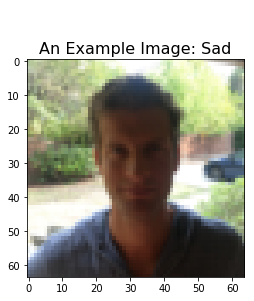

In [0]:
rando = random.randint(0,len(test_images)-1)
show(rando, 'An Example Image: {}'.format(class_names[test_labels[rando]]))

In [0]:
# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": test_images[0:10].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"instances": [[[[0.8745098039215686, 0.8117647058 ... 6274509805]]]], "signature_name": "serving_default"}


In [0]:
!pip install -q requests


In [0]:

import requests


In [0]:
headers = {"content-type": "application/json"}
json_response = requests.post('http://localhost:8501/v1/models/smiling_model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']


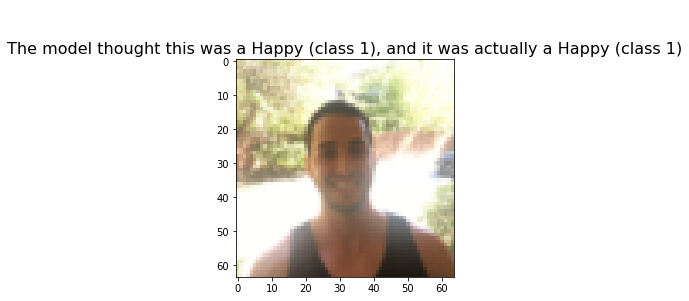

In [0]:

show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
  class_names[int(np.round(predictions[0]))], int(np.round(predictions[0])), class_names[test_labels[0]], test_labels[0]))

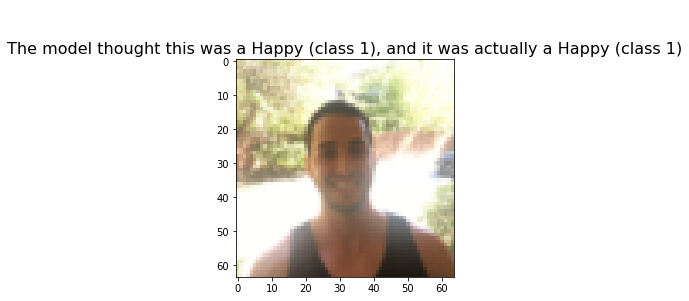

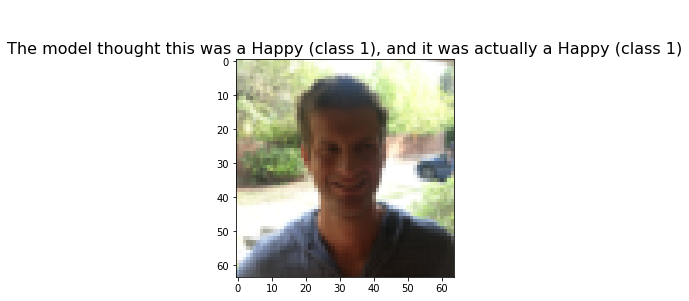

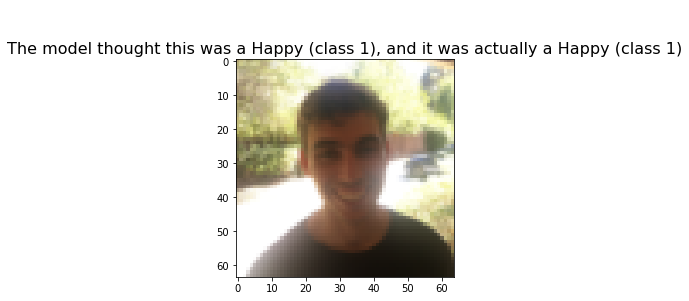

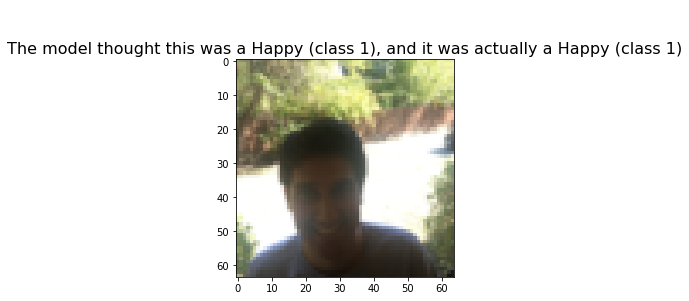

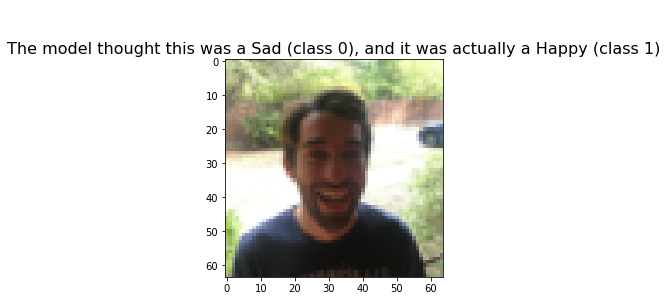

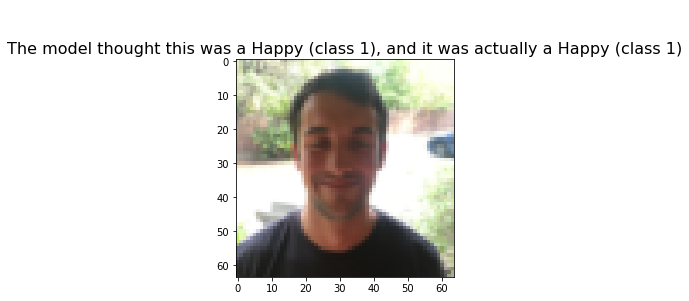

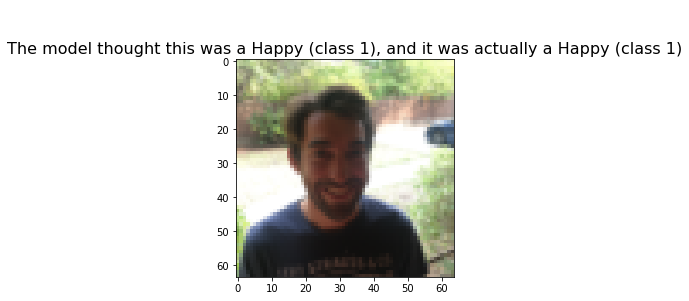

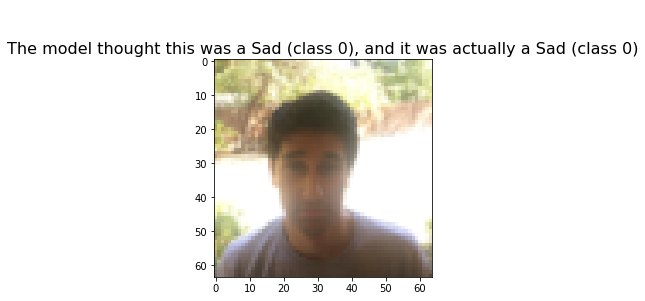

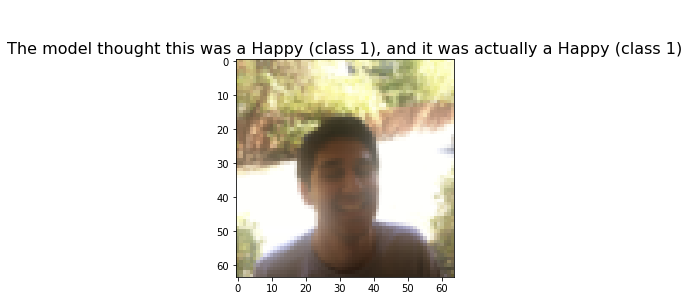

In [0]:

for i in range(0,9):
  show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
    class_names[int(np.round(predictions[i]))], int(np.round(predictions[i])), class_names[test_labels[i]], test_labels[i]))